In [97]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 读取数据 

In [98]:
df = pd.read_csv("./data/coursework_1_data_2019.csv")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In [100]:
df.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,...,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,"1,075.2961","1,159.5132","1,278.6053","340,922.3158","354,282.0921","368,289.4803",375.7961,401.5263,438.2763,"166,914.7500",...,"174,007.5658","182,291.4803","191,112.5000","270,309.2105","59,368.4211","68,427.6316","25,111.8421","62,631.5789","32,967.1053","21,802.6316"
std,922.3787,997.2310,"1,069.6920","262,135.3866","278,874.4681","294,596.8620",323.5608,353.7565,376.4780,"128,635.2720",...,"133,527.4995","142,585.6903","149,675.4815","210,461.7828","53,980.9488","62,114.9972","22,815.2817","55,056.1043","29,930.2540","19,832.4236"
min,5.0000,1.0000,4.0000,"2,200.0000","2,385.0000","2,440.0000",2.0000,0.0000,1.0000,"1,085.0000",...,"1,115.0000","1,080.0000","1,014.0000","2,000.0000",0.0000,0.0000,0.0000,"2,000.0000",0.0000,0.0000
25%,493.5000,531.7500,592.5000,"189,474.7500","188,067.2500","193,428.5000",175.7500,183.2500,198.2500,"93,000.2500",...,"95,983.7500","99,307.2500","101,902.7500","140,000.0000","26,000.0000","32,000.0000","11,750.0000","31,750.0000","14,000.0000","9,000.0000"
50%,729.0000,794.5000,873.5000,"254,092.5000","257,771.5000","264,203.5000",266.0000,271.0000,293.5000,"122,694.0000",...,"128,675.5000","135,104.0000","140,668.5000","200,000.0000","41,500.0000","48,000.0000","18,000.0000","45,000.0000","25,000.0000","16,000.0000"
75%,"1,386.0000","1,470.2500","1,641.5000","375,122.5000","402,499.0000","409,428.5000",473.7500,519.2500,554.7500,"183,610.0000",...,"191,395.5000","197,497.7500","213,147.7500","301,750.0000","70,000.0000","79,000.0000","26,500.0000","69,750.0000","39,750.0000","27,250.0000"
max,"5,065.0000","5,582.0000","5,745.0000","1,411,380.0000","1,528,154.0000","1,623,387.0000","1,762.0000","2,065.0000","2,000.0000","694,681.0000",...,"716,699.0000","773,508.0000","832,527.0000","1,170,000.0000","297,000.0000","333,000.0000","130,000.0000","340,000.0000","203,000.0000","99,000.0000"


In [101]:
df.drop(columns=['local_authority_area', 'region'],inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   2008_cases_total      152 non-null    int64 
 1   2013_cases_total      152 non-null    int64 
 2   2018_cases_total      152 non-null    int64 
 3   2008_pop_total        152 non-null    int64 
 4   2013_pop_total        152 non-null    int64 
 5   2018_pop_total        152 non-null    int64 
 6   2008_cases_male       152 non-null    int64 
 7   2013_cases_male       152 non-null    int64 
 8   2018_cases_male       152 non-null    int64 
 9   2008_pop_male         152 non-null    int64 
 10  2013_pop_male         152 non-null    int64 
 11  2018_pop_male         152 non-null    int64 
 12  2008_cases_female     152 non-null    int64 
 13  2013_cases_female     152 non-null    int64 
 14  2018_cases_female     152 non-null    int64 
 15  2008_pop_female       152 non-null    in

In [103]:
df.iloc[:,0:1]

,2008_cases_total
0,593
1,539
2,360
3,456
4,311
5,519
6,3207
7,831
8,583
9,505


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     314.8
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.14e-38
Time:                        20:58:29   Log-Likelihood:                -1166.9
No. Observations:                 152   AIC:                             2338.
Df Residuals:                     150   BIC:                             2344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.0380     70.101      1.256      0.2

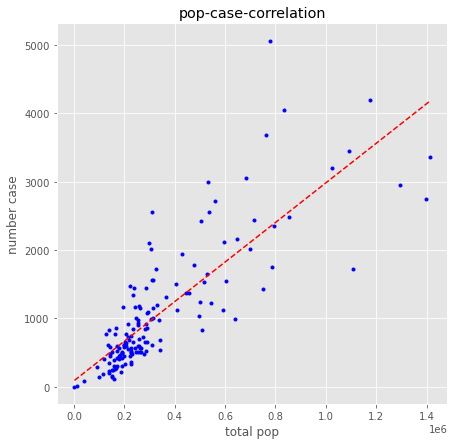

In [104]:
figure_width, figure_height = 7,7

# You can ignore these two lines:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np
x_values = np.array(df.iloc[:,3:4])
y_values = np.array(df.iloc[:,0:1])
# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# Uncomment these lines to set the axis limits (otherwise they will be set automatically):
#x_min,x_max = 0,5000000
#y_min,y_max = 0,5000000
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

# The next lines create and save the plot:
plt.title("pop-case-correlation")
plt.ylabel("number case")
plt.xlabel("total pop")
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')

In [105]:
df.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,...,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,"1,075.2961","1,159.5132","1,278.6053","340,922.3158","354,282.0921","368,289.4803",375.7961,401.5263,438.2763,"166,914.7500",...,"174,007.5658","182,291.4803","191,112.5000","270,309.2105","59,368.4211","68,427.6316","25,111.8421","62,631.5789","32,967.1053","21,802.6316"
std,922.3787,997.2310,"1,069.6920","262,135.3866","278,874.4681","294,596.8620",323.5608,353.7565,376.4780,"128,635.2720",...,"133,527.4995","142,585.6903","149,675.4815","210,461.7828","53,980.9488","62,114.9972","22,815.2817","55,056.1043","29,930.2540","19,832.4236"
min,5.0000,1.0000,4.0000,"2,200.0000","2,385.0000","2,440.0000",2.0000,0.0000,1.0000,"1,085.0000",...,"1,115.0000","1,080.0000","1,014.0000","2,000.0000",0.0000,0.0000,0.0000,"2,000.0000",0.0000,0.0000
25%,493.5000,531.7500,592.5000,"189,474.7500","188,067.2500","193,428.5000",175.7500,183.2500,198.2500,"93,000.2500",...,"95,983.7500","99,307.2500","101,902.7500","140,000.0000","26,000.0000","32,000.0000","11,750.0000","31,750.0000","14,000.0000","9,000.0000"
50%,729.0000,794.5000,873.5000,"254,092.5000","257,771.5000","264,203.5000",266.0000,271.0000,293.5000,"122,694.0000",...,"128,675.5000","135,104.0000","140,668.5000","200,000.0000","41,500.0000","48,000.0000","18,000.0000","45,000.0000","25,000.0000","16,000.0000"
75%,"1,386.0000","1,470.2500","1,641.5000","375,122.5000","402,499.0000","409,428.5000",473.7500,519.2500,554.7500,"183,610.0000",...,"191,395.5000","197,497.7500","213,147.7500","301,750.0000","70,000.0000","79,000.0000","26,500.0000","69,750.0000","39,750.0000","27,250.0000"
max,"5,065.0000","5,582.0000","5,745.0000","1,411,380.0000","1,528,154.0000","1,623,387.0000","1,762.0000","2,065.0000","2,000.0000","694,681.0000",...,"716,699.0000","773,508.0000","832,527.0000","1,170,000.0000","297,000.0000","333,000.0000","130,000.0000","340,000.0000","203,000.0000","99,000.0000"


# Encoding of categorical variables

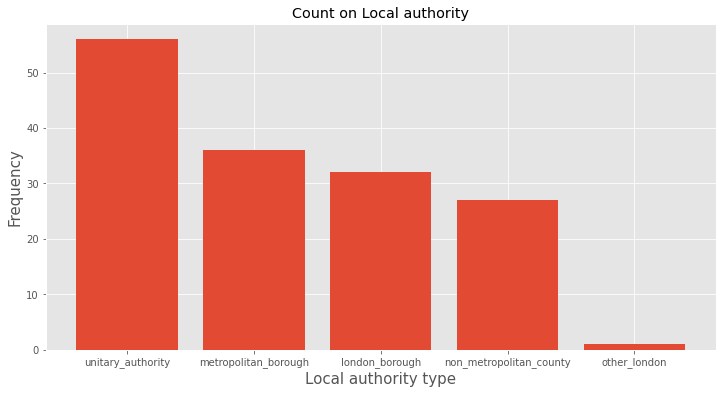

<Figure size 432x288 with 0 Axes>

In [106]:
output_filename = 'histogram'
df2 = df.local_authority_type.value_counts()
x = df2.index
y = df2.values
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.ylabel('Frequency',fontsize=15)
plt.xlabel('Local authority type',fontsize=15)
plt.title('Count on Local authority')
plt.show()
plt.savefig(output_filename)


In [107]:
df.local_authority_type.value_counts()

unitary_authority          56
metropolitan_borough       36
london_borough             32
non_metropolitan_county    27
other_london                1
Name: local_authority_type, dtype: int64

In [108]:
df=df[~df['local_authority_type'].isin(['other_london'])]

In [109]:
df_numeric = pd.get_dummies(df)

In [110]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 151
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   2008_cases_total                              151 non-null    int64
 1   2013_cases_total                              151 non-null    int64
 2   2018_cases_total                              151 non-null    int64
 3   2008_pop_total                                151 non-null    int64
 4   2013_pop_total                                151 non-null    int64
 5   2018_pop_total                                151 non-null    int64
 6   2008_cases_male                               151 non-null    int64
 7   2013_cases_male                               151 non-null    int64
 8   2018_cases_male                               151 non-null    int64
 9   2008_pop_male                                 151 non-null    int64
 10  2013_pop_male 

# y值处理

In [111]:
df_numeric['average-obesity-rates-change'] = ((df_numeric['2018_cases_total']/df_numeric['2018_pop_total'])-(df_numeric['2008_cases_total']/df_numeric['2008_pop_total']))*1000.00

In [112]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 151
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   2008_cases_total                              151 non-null    int64  
 1   2013_cases_total                              151 non-null    int64  
 2   2018_cases_total                              151 non-null    int64  
 3   2008_pop_total                                151 non-null    int64  
 4   2013_pop_total                                151 non-null    int64  
 5   2018_pop_total                                151 non-null    int64  
 6   2008_cases_male                               151 non-null    int64  
 7   2013_cases_male                               151 non-null    int64  
 8   2018_cases_male                               151 non-null    int64  
 9   2008_pop_male                                 151 non-null    int

# X

In [113]:
df_numeric['clean_air_log'] = np.log(df_numeric['clean_air'])
df_numeric['clean_environ_log'] = np.log(df_numeric['clean_environ'])
df_numeric['health_training_log'] = np.log(df_numeric['health_training'])
df_numeric['school_awareness_log'] = np.log(df_numeric['school_awareness'])
df_numeric['media_awareness_log'] = np.log(df_numeric['media_awareness'])
df_numeric['sub_counselling_log'] = np.log(df_numeric['sub_counselling'])

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [114]:
df_numeric.head()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_unitary_authority,average-obesity-rates-change,clean_air_log,clean_environ_log,health_training_log,school_awareness_log,media_awareness_log,sub_counselling_log
0,593,619,763,172684,179030,181779,187,190,230,83890,...,0,0,0,0.7634,9.9523,9.9988,9.7981,10.6213,9.7981,9.8522
1,539,594,773,340435,344062,355955,212,204,292,169060,...,0,0,0,0.5884,10.8198,9.7410,10.0432,11.2118,10.3090,10.1659
2,360,451,527,226755,244010,257883,148,186,212,110384,...,1,0,0,0.4559,10.6213,10.7144,8.5172,10.1659,10.2751,9.5468
3,456,421,494,178625,172975,189334,157,129,156,87026,...,0,0,1,0.0563,10.4043,10.6454,9.8522,10.8198,9.2103,8.8537
4,311,327,367,158185,164807,170463,138,145,156,75929,...,0,0,1,0.1869,10.5187,10.8590,9.7410,8.9872,8.0064,9.4727


In [115]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 151
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   2008_cases_total                              151 non-null    int64  
 1   2013_cases_total                              151 non-null    int64  
 2   2018_cases_total                              151 non-null    int64  
 3   2008_pop_total                                151 non-null    int64  
 4   2013_pop_total                                151 non-null    int64  
 5   2018_pop_total                                151 non-null    int64  
 6   2008_cases_male                               151 non-null    int64  
 7   2013_cases_male                               151 non-null    int64  
 8   2018_cases_male                               151 non-null    int64  
 9   2008_pop_male                                 151 non-null    int

In [116]:
df_rate=df_numeric.iloc[:,25:]

In [117]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 151
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   local_authority_type_london_borough           151 non-null    uint8  
 1   local_authority_type_metropolitan_borough     151 non-null    uint8  
 2   local_authority_type_non_metropolitan_county  151 non-null    uint8  
 3   local_authority_type_unitary_authority        151 non-null    uint8  
 4   average-obesity-rates-change                  151 non-null    float64
 5   clean_air_log                                 151 non-null    float64
 6   clean_environ_log                             151 non-null    float64
 7   health_training_log                           151 non-null    float64
 8   school_awareness_log                          151 non-null    float64
 9   media_awareness_log                           151 non-null    flo

# outliner

In [118]:
df_rate.describe()

,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_unitary_authority,average-obesity-rates-change,clean_air_log,clean_environ_log,health_training_log,school_awareness_log,media_awareness_log,sub_counselling_log
count,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000
mean,0.2119,0.2384,0.1788,0.3709,0.3513,-inf,-inf,-inf,10.7569,-inf,-inf
std,0.4100,0.4275,0.3845,0.4846,0.2518,NaN,NaN,NaN,0.7927,NaN,NaN
min,0.0000,0.0000,0.0000,0.0000,-0.6334,-inf,-inf,-inf,7.6009,-inf,-inf
25%,0.0000,0.0000,0.0000,0.0000,0.1794,10.1659,10.3735,9.4327,10.3735,9.5468,9.1050
50%,0.0000,0.0000,0.0000,0.0000,0.3145,10.6454,10.7790,9.7981,10.7144,10.1266,9.6803
75%,0.0000,0.0000,0.0000,1.0000,0.5085,11.1563,11.2772,10.2029,11.1631,10.6084,10.2218
max,1.0000,1.0000,1.0000,1.0000,1.0145,12.6015,12.7159,11.7753,12.7367,12.2210,11.5029


In [119]:
df_rate.head()

,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_unitary_authority,average-obesity-rates-change,clean_air_log,clean_environ_log,health_training_log,school_awareness_log,media_awareness_log,sub_counselling_log
0,1,0,0,0,0.7634,9.9523,9.9988,9.7981,10.6213,9.7981,9.8522
1,1,0,0,0,0.5884,10.8198,9.7410,10.0432,11.2118,10.3090,10.1659
2,0,1,0,0,0.4559,10.6213,10.7144,8.5172,10.1659,10.2751,9.5468
3,0,0,0,1,0.0563,10.4043,10.6454,9.8522,10.8198,9.2103,8.8537
4,0,0,0,1,0.1869,10.5187,10.8590,9.7410,8.9872,8.0064,9.4727


In [120]:
df_rate_box = df_rate.iloc[:,5:]

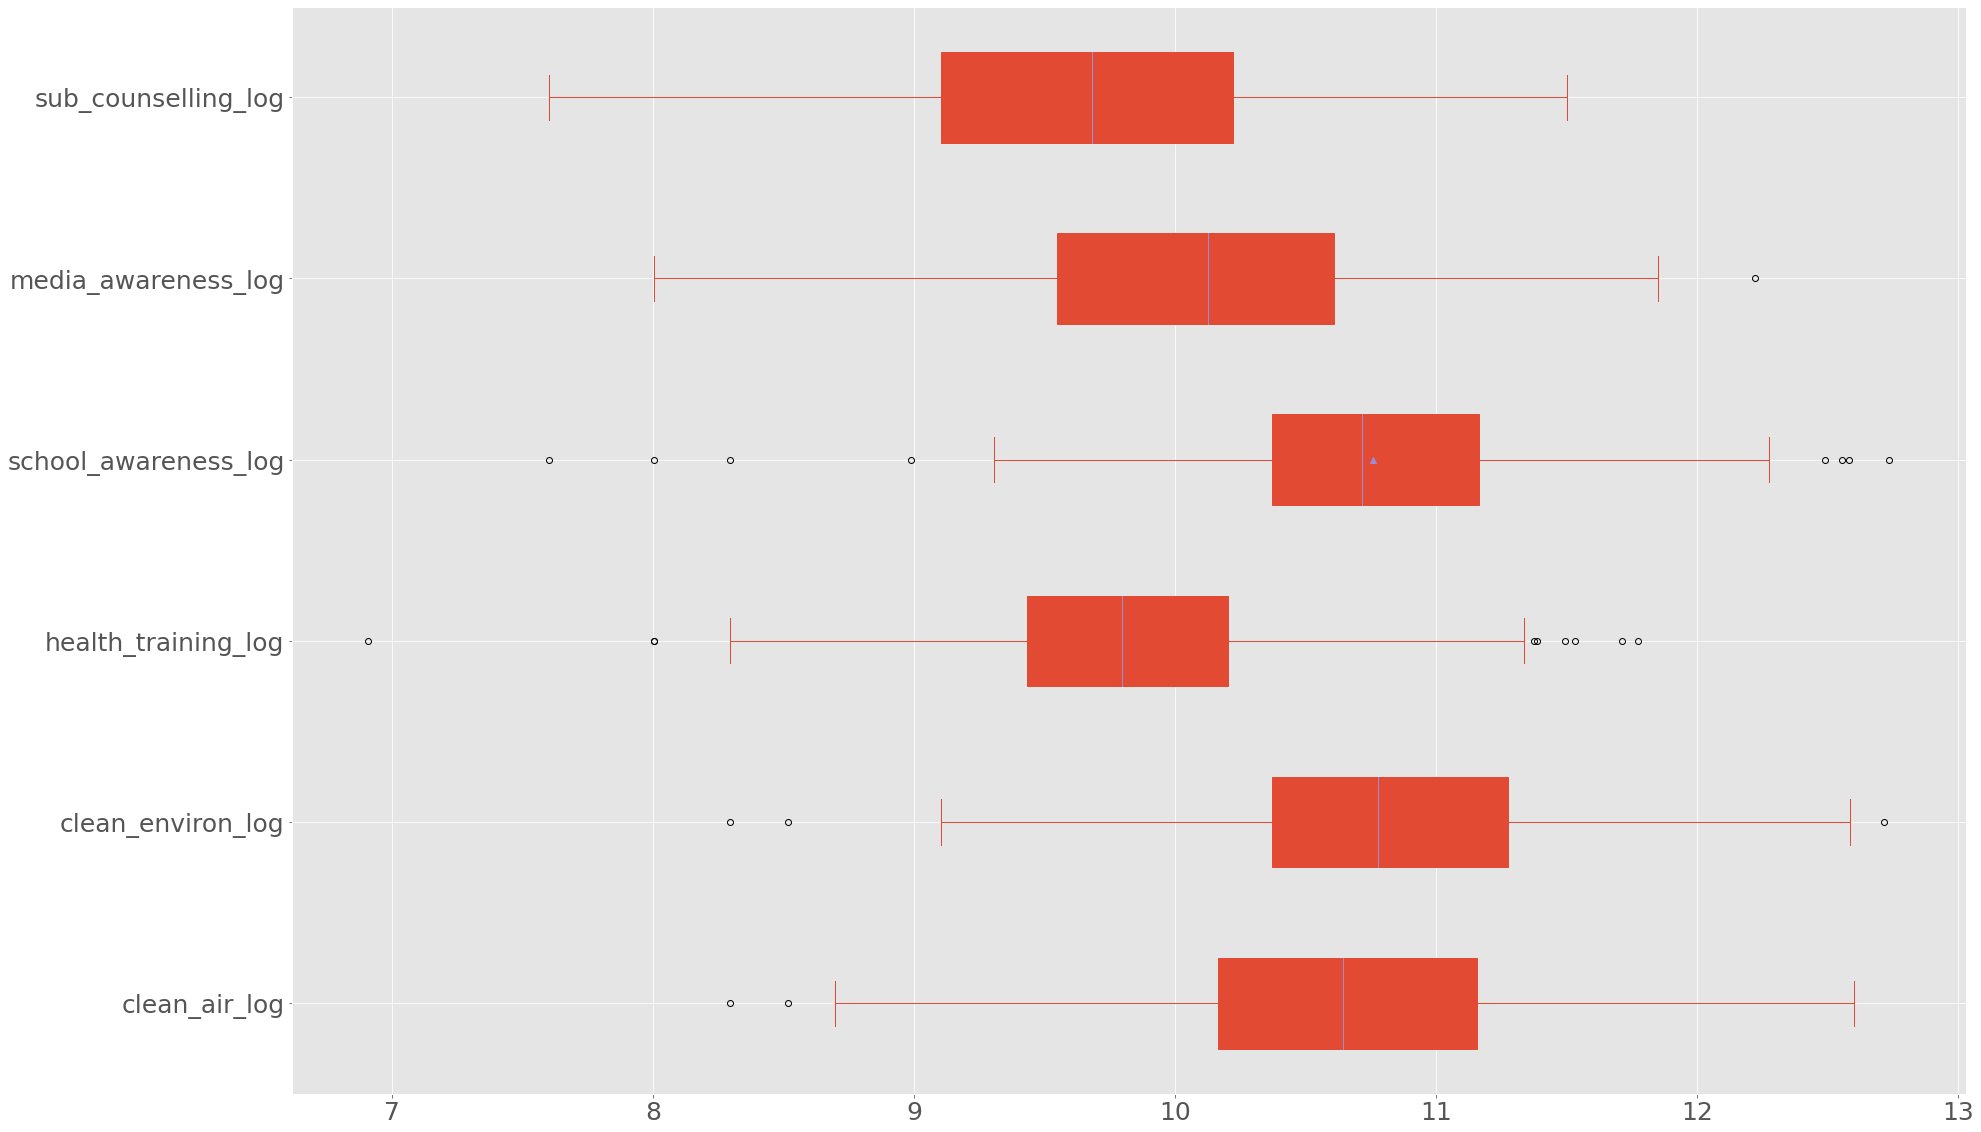

In [121]:
plt.style.use('ggplot')
df_rate_box.plot.box(figsize=(30,20),fontsize=25,vert=False,patch_artist=True,showmeans=True)
plt.show()

In [122]:
column_name = list(df_rate.columns)

In [123]:
column_name

['local_authority_type_london_borough',
 'local_authority_type_metropolitan_borough',
 'local_authority_type_non_metropolitan_county',
 'local_authority_type_unitary_authority',
 'average-obesity-rates-change',
 'clean_air_log',
 'clean_environ_log',
 'health_training_log',
 'school_awareness_log',
 'media_awareness_log',
 'sub_counselling_log']

In [124]:
for i in column_name[5:]:
    print(i)

clean_air_log
clean_environ_log
health_training_log
school_awareness_log
media_awareness_log
sub_counselling_log


In [125]:
for i in column_name[5:]:
    upper_limit_i = df_rate[i].quantile(0.99)
    lower_limit_i = df_rate[i].quantile(0.01)
    new_df_rate=df_rate[(df_rate[i]<=upper_limit_i)&(df_rate[i]>=lower_limit_i)]

In [129]:
for i in column_name[5:]:
    upper_limit_i = df_rate[i].quantile(0.99)
    lower_limit_i = df_rate[i].quantile(0.01)
    new_df_rate_outliner=df_rate[(df_rate[i]>=upper_limit_i)|(df_rate[i]<=lower_limit_i)]

In [130]:
new_df_rate_outliner

,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_unitary_authority,average-obesity-rates-change,clean_air_log,clean_environ_log,health_training_log,school_awareness_log,media_awareness_log,sub_counselling_log
6,0,1,0,0,0.4895,11.0666,12.5136,11.7753,11.7440,11.8494,11.5029
42,0,0,1,0,0.1201,12.6015,12.5062,10.7579,12.5567,11.2252,11.4825
59,0,0,0,1,-0.6334,-inf,-inf,-inf,7.6009,-inf,-inf
60,1,0,0,0,0.7080,10.4341,10.7144,9.4727,10.2036,9.8522,7.6009
105,0,0,0,1,-0.2916,9.7410,8.5172,8.9872,9.5468,8.5172,7.6009


In [126]:
new_df_rate

,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_unitary_authority,average-obesity-rates-change,clean_air_log,clean_environ_log,health_training_log,school_awareness_log,media_awareness_log,sub_counselling_log
0,1,0,0,0,0.7634,9.9523,9.9988,9.7981,10.6213,9.7981,9.8522
1,1,0,0,0,0.5884,10.8198,9.7410,10.0432,11.2118,10.3090,10.1659
2,0,1,0,0,0.4559,10.6213,10.7144,8.5172,10.1659,10.2751,9.5468
3,0,0,0,1,0.0563,10.4043,10.6454,9.8522,10.8198,9.2103,8.8537
4,0,0,0,1,0.1869,10.5187,10.8590,9.7410,8.9872,8.0064,9.4727
5,1,0,0,0,0.5845,11.1844,10.2036,9.5468,11.0666,9.6158,8.8537
7,0,0,0,1,0.8439,9.6158,9.6803,9.4727,9.9523,9.7981,8.9872
8,0,0,0,1,0.1044,10.0858,9.8522,9.1050,10.2400,9.2103,9.1050
9,0,1,0,0,0.5030,10.9151,11.1273,9.3057,10.1266,10.3417,9.3057
10,0,0,0,1,0.0311,10.3417,10.3090,9.7410,10.5713,8.8537,8.6995


In [127]:
new_df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 151
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   local_authority_type_london_borough           148 non-null    uint8  
 1   local_authority_type_metropolitan_borough     148 non-null    uint8  
 2   local_authority_type_non_metropolitan_county  148 non-null    uint8  
 3   local_authority_type_unitary_authority        148 non-null    uint8  
 4   average-obesity-rates-change                  148 non-null    float64
 5   clean_air_log                                 148 non-null    float64
 6   clean_environ_log                             148 non-null    float64
 7   health_training_log                           148 non-null    float64
 8   school_awareness_log                          148 non-null    float64
 9   media_awareness_log                           148 non-null    flo

# Using VIF to deal with multicollinearity

In [75]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [76]:
# using VIF on the bike_rental dataset
df_predictors_selected_VIF = drop_column_using_vif_( new_df_rate.drop('average-obesity-rates-change', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: local_authority_type_london_borough
The columns remaining after VIF selection are:
Index(['local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county',
       'local_authority_type_unitary_authority', 'clean_air_log',
       'clean_environ_log', 'health_training_log', 'school_awareness_log',
       'media_awareness_log', 'sub_counselling_log'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [77]:
X = add_constant( new_df_rate.drop("local_authority_type_london_borough",axis=1))
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                                                                          805.6011
local_authority_type_metropolitan_borough                                        2.0333
local_authority_type_non_metropolitan_county                                     5.0327
local_authority_type_unitary_authority                                           4.0708
average-obesity-rates-change                                                     2.9325
clean_air_log                                                                    1.9236
clean_environ_log                                                                1.6798
health_training_log                                                              1.8502
school_awareness_log                                                             2.0600
media_awareness_log                                                              2.3663
sub_counselling_log                                                              2.6677
dtype: float64

In [78]:
X =new_df_rate.drop(["local_authority_type_metropolitan_borough","average-obesity-rates-change"],axis=1)
df_with_const = add_constant(X)
vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df.round(3).to_csv("vif.csv")
vif_df

,VIF
local_authority_type_london_borough,1.5268
local_authority_type_non_metropolitan_county,2.7028
local_authority_type_unitary_authority,1.8154
clean_air_log,1.9003
clean_environ_log,1.6731
health_training_log,1.8421
school_awareness_log,1.8053
media_awareness_log,2.0674
sub_counselling_log,2.5685


In [79]:
model_df_rate = sm.OLS(endog= new_df_rate[['average-obesity-rates-change']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_df_rate.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     average-obesity-rates-change   R-squared:                       0.659
Model:                                      OLS   Adj. R-squared:                  0.637
Method:                           Least Squares   F-statistic:                     29.63
Date:                          Sat, 13 Nov 2021   Prob (F-statistic):           3.60e-28
Time:                                  15:51:29   Log-Likelihood:                 81.384
No. Observations:                           148   AIC:                            -142.8
Df Residuals:                               138   BIC:                            -112.8
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4435      0.335      1.323      0.188      -0.219       1.106
local_authority_type_metropolitan_borough       -0.2095      0.036     -5.872      0.000      -0.280      -0.139
local_authority_type_non_metropolitan_county    -0.5361      0.053    -10.085      0.000      -0.641      -0.431
local_authority_type_unitary_authority          -0.4351      0.033    -13.174      0.000      -0.500      -0.370
clean_air_log                                   -0.0274      0.021     -1.301      0.195      -0.069       0.014
clean_environ_log                               -0.0149      0.020     -0.746      0.457      -0.054       0.025
health_training_log                              0.0165      0.021      0.778      0.438      -0.025       0.058
school_awareness_log                            -0.0958      0.022     -4.412      0.000      -0.139      -0.053
media_awareness_log                              0.0988      0.022      4.467      0.000       0.055       0.143
sub_counselling_log                              0.0566      0.024      2.309      0.022       0.008       0.105
==============================================================================
Omnibus:                       10.616   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               20.972
Skew:                           0.243   Prob(JB):                     2.79e-05
Kurtosis:                       4.779   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

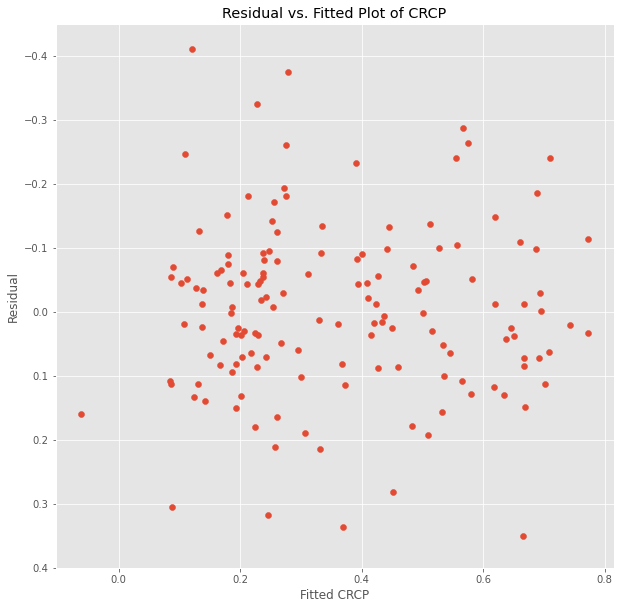

In [139]:
# plot 
plt.figure(figsize=(10,10))
plt.scatter(model_df_rate.fittedvalues, model_df_rate.resid)
# adding title and labels
plt.ylim([0.4,-0.45])
plt.xlabel('Fitted CRCP')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of CRCP')
plt.show()